In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #accuracy calculation
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_excel('musicas_features.xlsx', usecols = "B:T")
df = df[(df['id'].notnull()) & (df['Ano'] != 2020)]
df = df.drop_duplicates(subset=['id'], keep='last')
df['Ano'] = df['Ano'].astype(int)
df.head()

,Posicao,Musica,Artista,Ano,id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.0,Balancê,Gal Costa,1980,2m1G38M0gJuE4aVPh0tmIP,1979-01-08,0.638,0.736,9.0,-10.536,1.0,0.0811,0.0849,0.000000,0.333,0.881,144.823,188667.0,4.0
1,4.0,Momentos,Joanna,1980,5ncQCIFnjpHWRXbuKFG8RP,2002-11-08,0.501,0.296,7.0,-12.018,0.0,0.0292,0.8020,0.006370,0.117,0.305,132.462,235147.0,4.0
2,5.0,Menino do Rio,Baby Consuelo,1980,6tisytwaOaBA4CAZPPdlFP,1978-09-14,0.380,0.548,0.0,-9.260,1.0,0.0333,0.7300,0.000142,0.310,0.395,152.498,263733.0,4.0
3,6.0,Toada (Na Direção do Dia),Boca Livre,1980,2LO6c0rfmBm49Qs9KtQR1W,2007-01-01,0.402,0.506,6.0,-13.094,0.0,0.0409,0.9280,0.000946,0.728,0.446,97.082,233707.0,4.0
4,9.0,Meu Bem Querer,Djavan,1980,5ogHB4oYt1C7kaWJYm5MDG,1999-03-25,0.519,0.457,9.0,-8.450,1.0,0.0326,0.7630,0.000666,0.796,0.264,81.561,254800.0,4.0


## Determinando a década de cada música

In [3]:
def obter_decada(linha):
    ano = str(linha['Ano'])
    if "198" in ano:
        return "1980"
    if "199" in ano:
        return "1999"
    if "200" in ano:
        return "2000"
    if "201" in ano:
        return "2010"
    return "-"

df['Decada'] = df.apply (lambda x: obter_decada(x), axis=1)

In [4]:
df.isnull().sum()

Posicao             0
Musica              0
Artista             0
Ano                 0
id                  0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
Decada              0
dtype: int64

##  Dividindo o dataset em base de teste e treino

In [5]:
atributos = ['danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
        'valence', 'tempo', 'duration_ms', 'time_signature']

X = df[atributos]
y = pd.factorize(df['Decada'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Encontrando os melhores parâmetros 

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# # Para cada parâmetro que o RandomForestClassifier pode receber, vamos atruir uma lista de possíveis valores a eles. 

# # Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 50)], # Number of trees in random forest
#                'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': [int(x) for x in np.linspace(10, 210, num = 11)], # Maximum number of levels in tree
#                'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
#                'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
#                'bootstrap': [True, False] # # Method of selecting samples for training each tree
              } 

print(random_grid)

{'n_estimators': [1000, 1081, 1163, 1244, 1326, 1408, 1489, 1571, 1653, 1734, 1816, 1897, 1979, 2061, 2142, 2224, 2306, 2387, 2469, 2551, 2632, 2714, 2795, 2877, 2959, 3040, 3122, 3204, 3285, 3367, 3448, 3530, 3612, 3693, 3775, 3857, 3938, 4020, 4102, 4183, 4265, 4346, 4428, 4510, 4591, 4673, 4755, 4836, 4918, 5000], 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210]}
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1888; total time=  15.5s
[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=4555; total time=  37.9s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5000; total time=  43.3s
[CV] END bootstrap=False, max_depth=190, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=  49.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=5000; total time=  42.6s
[CV] END bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=3222; total time=  29.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3222; total time=  30.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=5000; total time=  42.9s
[CV] END bootstrap=True, max_depth=210, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2333; total time=  17.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4111; total time=  37.2s
[CV] END bootstrap=False, max_depth=190, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5000; total time=  48.6s
[CV] END bootstrap=True, max_dep

In [20]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions=random_grid, 
#                                n_iter = 100, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 30, 50, 70, 90, 110,
                                                      130, 150, 170, 190, 210],
                                        'n_estimators': [1000, 1081, 1163, 1244,
                                                         1326, 1408, 1489, 1571,
                                                         1653, 1734, 1816, 1897,
                                                         1979, 2061, 2142, 2224,
                                                         2306, 2387, 2469, 2551,
                                                         2632, 2714, 2795, 2877,
                                                         2959, 3040, 3122, 3204,
                                                         3285, 3367, ...]},
                   random_state=42, verbose=2)

In [21]:
print(rf_random.best_params_)

{'n_estimators': 3775, 'max_depth': 30}


## Classificando os dados

In [22]:
rfc = RandomForestClassifier(n_estimators=3775, max_depth=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=3775)

In [ ]:
rfc.predict_proba(X_test)[0:10]

In [23]:
y_pred = rfc.predict(X_test)

print("accuracy_score:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='weighted'))

accuracy_score: 0.5490848585690515
f1_score: 0.5481596410291154


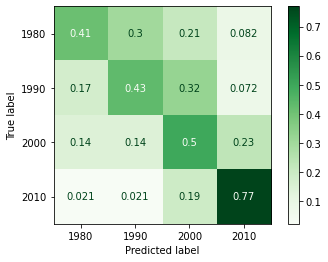

In [24]:
disp = plot_confusion_matrix(rfc, X_test, y_test,
                             display_labels=[1980, 1990, 2000, 2010],
                             cmap=plt.cm.Greens,
                             normalize='true')

plt.show()

## Descobrindo atributos mais importantes 

In [16]:
atributos_importancia = pd.Series(rfc.feature_importances_,index=atributos).sort_values(ascending=False)
atributos_importancia

loudness            0.165080
duration_ms         0.139014
energy              0.088109
danceability        0.087186
acousticness        0.085526
speechiness         0.082589
valence             0.081404
liveness            0.079664
tempo               0.077238
instrumentalness    0.051899
key                 0.046292
mode                0.010886
time_signature      0.005115
dtype: float64

<AxesSubplot:>

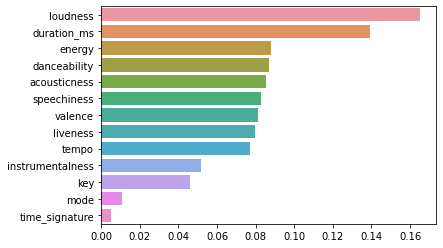

In [17]:
sns.barplot(x=atributos_importancia, y=atributos_importancia.index)

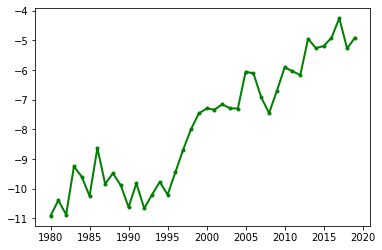

In [18]:
loudness = df.groupby(by='Ano').mean()['loudness'].reset_index()

plt.plot('Ano', 'loudness', data=loudness, marker='.', color='green', linewidth=2)